In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Flight Delays and Cancellations Dataset

In [0]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
!unzip "/content/flights.pkl.zip"

Archive:  /content/flights.pkl.zip
  inflating: flights.pkl             
   creating: __MACOSX/
  inflating: __MACOSX/._flights.pkl  


In [0]:
df = pd.read_pickle('flights.pkl')

In [0]:
!pip install tensorflow==2.0

In [0]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Monthd,MY,carrier_name,ORIGIN_AirportName,ORIGIN_latitude,ORIGIN_longitude,ORIGIN_elevation_ft,DEST_AirportName,DEST_latitude,DEST_longitude,DEST_elevation_ft
0,2018,4,10,1,1,2018-10-01,WN,19393,WN,4025,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1555,1610.0,15.0,15.0,1.0,1.0,1500-1559,10.0,1620.0,1903.0,3.0,1850,1906.0,16.0,16.0,1.0,1.0,1800-1859,0.0,E,0.0,115.0,116.0,103.0,1.0,759.0,4,2.0,0.0,1.0,0.0,13.0,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.040199,-106.609001,5355,William P Hobby,29.645399,-95.2789,46
1,2018,4,10,26,5,2018-10-26,WN,19393,WN,530,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,650,743.0,53.0,53.0,1.0,3.0,0600-0659,10.0,753.0,1032.0,2.0,950,1034.0,44.0,44.0,1.0,2.0,0900-0959,0.0,E,0.0,120.0,111.0,99.0,1.0,759.0,4,44.0,0.0,0.0,0.0,0.0,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.040199,-106.609001,5355,William P Hobby,29.645399,-95.2789,46
2,2018,4,10,26,5,2018-10-26,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1658.0,78.0,78.0,1.0,5.0,1500-1559,13.0,1711.0,1947.0,4.0,1840,1951.0,71.0,71.0,1.0,4.0,1800-1859,0.0,E,0.0,120.0,113.0,96.0,1.0,759.0,4,71.0,0.0,0.0,0.0,0.0,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.040199,-106.609001,5355,William P Hobby,29.645399,-95.2789,46
3,2018,4,10,25,4,2018-10-25,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1628.0,48.0,48.0,1.0,3.0,1500-1559,10.0,1638.0,1915.0,4.0,1840,1919.0,39.0,39.0,1.0,2.0,1800-1859,0.0,E,0.0,120.0,111.0,97.0,1.0,759.0,4,0.0,0.0,18.0,0.0,21.0,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.040199,-106.609001,5355,William P Hobby,29.645399,-95.2789,46
4,2018,4,10,11,4,2018-10-11,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1638.0,58.0,58.0,1.0,3.0,1500-1559,10.0,1648.0,1922.0,4.0,1840,1926.0,46.0,46.0,1.0,3.0,1800-1859,0.0,E,0.0,120.0,108.0,94.0,1.0,759.0,4,9.0,0.0,0.0,0.0,37.0,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.040199,-106.609001,5355,William P Hobby,29.645399,-95.2789,46


In [0]:
#The function below returns the above described windows of time for the model to train on. The parameter history_size is the size of the past window of information. The target_size is how far in the future does the model need to learn to predict. 
#The target_size is the label that needs to be predicted.
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [0]:
TRAIN_SPLIT = 300000

In [0]:
#Setting seed to ensure reproducibility.
tf.random.set_seed(13)

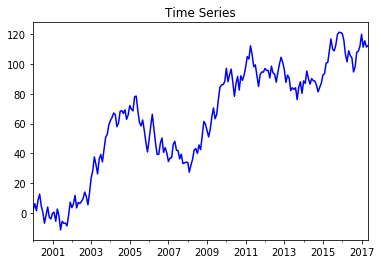

2000-01-31     1.967259
2000-02-29     6.180705
2000-03-31     1.496811
2000-04-30     8.602989
2000-05-31    12.624325
2000-06-30     4.767655
2000-07-31     0.418181
2000-08-31    -6.938824
2000-09-30    -1.477013
2000-10-31     3.930213
Freq: M, dtype: float64

In [0]:
#Forecast a univariate time series
random.seed(111)
rng = pd.date_range(start='2000', periods=209, freq='M')
df = pd.Series(np.random.uniform(-10, 10, size=len(rng)), rng).cumsum()
df.plot(c='b', title='Time Series')
plt.show()
df.head(10)

In [0]:
#Train a model using only a single feature (Dept. Delay), and use it to make predictions for that value in the future.
uni_data = df['DEP_DELAY']

uni_data.index = df['FL_DATE']
uni_data.head()

FL_DATE
2018-10-01    15.0
2018-10-26    53.0
2018-10-26    78.0
2018-10-25    48.0
2018-10-11    58.0
Name: DEP_DELAY, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21b99a8ba8>],
      dtype=object)

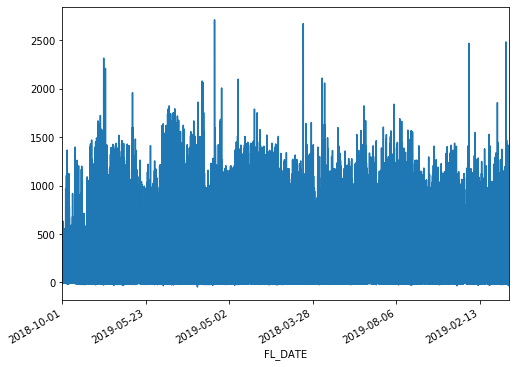

In [0]:
#Observation how this data looks across time...
uni_data.plot(subplots=True)

In [0]:
#Scale features before training a neural network. Standardization is a common way of doing this scaling by 
#subtracting the mean and dividing by the standard deviation of each feature.
uni_data = uni_data.values

In [0]:
#The mean and standard deviation should only be computed using the training data.
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [0]:
#standardize the data...
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [0]:
#creating the data for the univariate model. The model will be given the last 100 recorded Dept. 
#delay observations, and needs to learn to predict the dept. delay at the next time step.
univariate_past_history = 100
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [0]:
#This is what the univariate_data function returns.
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Dept. delays to predict')
print (y_train_uni[0])

Single window of past history
[[-0.50042613]
 [ 0.05569152]
 [ 0.4215584 ]
 [-0.01748185]
 [ 0.1288649 ]
 [ 1.38744696]
 [-0.73458093]
 [-0.19309795]
 [-0.60286886]
 [-0.71994626]
 [-0.41261808]
 [ 1.46062033]
 [ 1.03621476]
 [-0.70531158]
 [-0.17846328]
 [ 0.0703262 ]
 [ 0.55327048]
 [-0.3394447 ]
 [-0.280906  ]
 [-0.3979834 ]
 [ 0.3630197 ]
 [-0.71994626]
 [-0.0467512 ]
 [-0.13455925]
 [-0.35407938]
 [ 0.304481  ]
 [-0.09065523]
 [-0.5150608 ]
 [-0.20773263]
 [-0.38334873]
 [ 0.14349957]
 [ 0.40692373]
 [-0.48579145]
 [-0.13455925]
 [-0.58823418]
 [-0.67604223]
 [-0.71994626]
 [ 1.21183086]
 [ 1.79721786]
 [-0.42725275]
 [-0.63213821]
 [-0.3394447 ]
 [-0.25163665]
 [-0.71994626]
 [-0.71994626]
 [-0.32481003]
 [ 0.55327048]
 [ 0.17276893]
 [ 0.17276893]
 [-0.5150608 ]
 [-0.47115678]
 [-0.29554068]
 [-0.5735995 ]
 [-0.70531158]
 [-0.36871405]
 [-0.280906  ]
 [-0.55896483]
 [-0.69067691]
 [-0.71994626]
 [-0.0467512 ]
 [-0.71994626]
 [-0.58823418]
 [ 0.1288649 ]
 [-0.31017535]
 [ 0.56790

In [0]:
#The information given to the network is given in blue, and it must predict the value at the red cross.
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

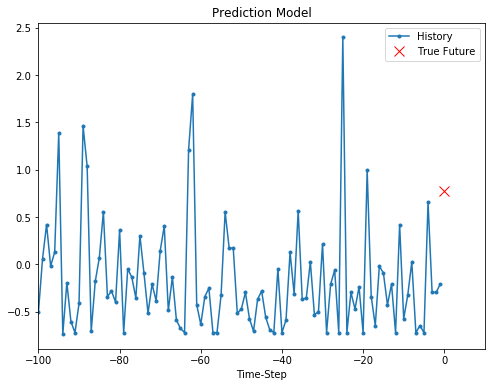

In [0]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Prediction Model')

In [0]:
#set a simple baseline. Given an input point, the baseline method looks at all the history 
#and predicts the next point to be the average of the last 100 observations.
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

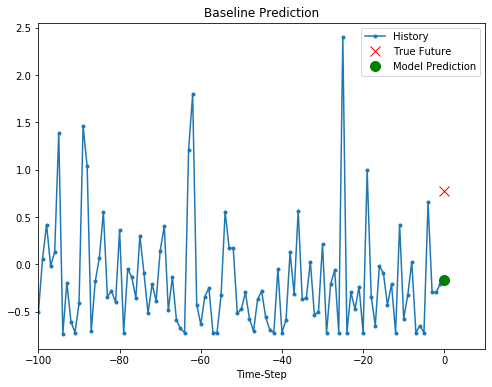

In [0]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction')

In [0]:
#Recurrent neural network
#A Recurrent Neural Network (RNN): 
#RNNs process a time series step-by-step, maintaining an internal state summarizing the information... 
#In this section, I will use a specialized RNN layer called Long Short Term Memory (LSTM)
#Use of tf.data to shuffle, batch, and cache the dataset.
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [0]:
#LSTM requires the input shape of the data it is being given.
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [0]:
#sample prediction, to check the output of the model.
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [0]:
#Training the model. Due to the large size of the dataset, in the interest of saving time, 
#each epoch will only run for 200 steps, instead of the complete training data as normally done.
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 10s 51ms/step - loss: 0.5090 - val_loss: 0.6252
Epoch 2/10
200/200 [==============================] - 9s 44ms/step - loss: 0.4835 - val_loss: 0.6255
Epoch 3/10
200/200 [==============================] - 9s 45ms/step - loss: 0.4972 - val_loss: 0.6244
Epoch 4/10
200/200 [==============================] - 9s 44ms/step - loss: 0.5502 - val_loss: 0.6252
Epoch 5/10
200/200 [==============================] - 9s 43ms/step - loss: 0.5888 - val_loss: 0.6243
Epoch 6/10
200/200 [==============================] - 8s 42ms/step - loss: 0.6016 - val_loss: 0.6251
Epoch 7/10
200/200 [==============================] - 9s 43ms/step - loss: 0.5105 - val_loss: 0.6251
Epoch 8/10
200/200 [==============================] - 9s 43ms/step - loss: 0.4794 - val_loss: 0.6254
Epoch 9/10
200/200 [==============================] - 8s 42ms/step - loss: 0.5006 - val_loss: 0.6238
Epoch 10/10
200/200 [==========================

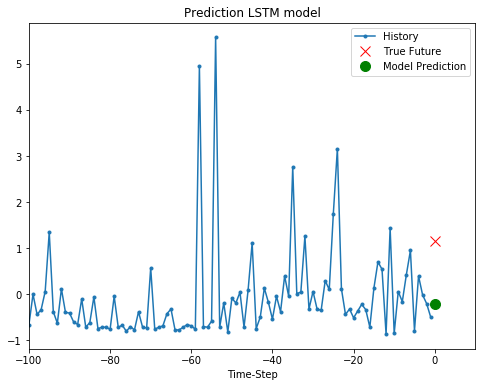

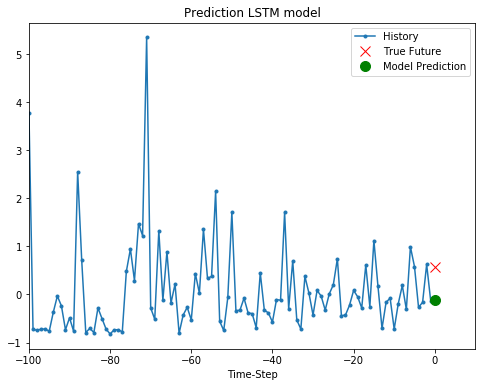

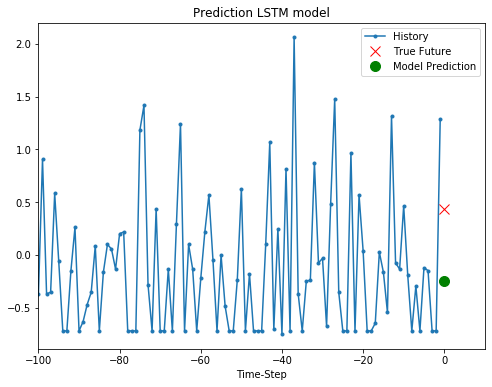

In [0]:
#Predict using the simple LSTM model
#Now that we have trained our simple LSTM, it's a predication time ;-)
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Prediction LSTM model')
  plot.show()

This looks better than the baseline. Now that you have seen the basics...

In [0]:
#Forecast a multivariate time series
features_considered = ['DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW']

In [0]:
features = df[features_considered]
features.index = df['FL_DATE']
features.head()

,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW
FL_DATE,,,,,,
2018-10-01,1610.0,15.0,15.0,1906.0,16.0,16.0
2018-10-26,743.0,53.0,53.0,1034.0,44.0,44.0
2018-10-26,1658.0,78.0,78.0,1951.0,71.0,71.0
2018-10-25,1628.0,48.0,48.0,1919.0,39.0,39.0
2018-10-11,1638.0,58.0,58.0,1926.0,46.0,46.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21a7979e80>,
      dtype=object)

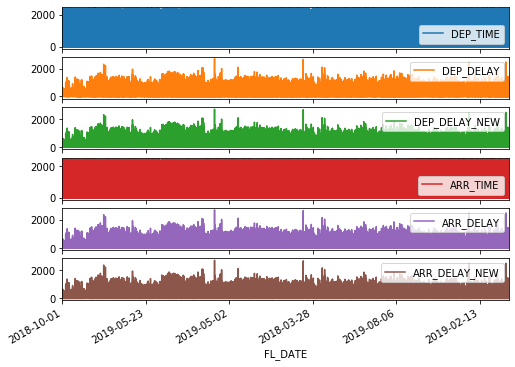

In [0]:
#Now, how each of these features vary across time.
features.plot(subplots=True)

In [0]:
#As mentioned, the first step will be to standardize the dataset using the mean and standard deviation of the training data.
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [0]:
dataset = (dataset-data_mean)/data_std

In [0]:
#Single step model
#In a single step setup, the model learns to predict a single point in the future based on some history provided.
#The below function performs the same windowing task as below, however, here it samples the past observation based on the step size given.
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [0]:
#In this section, the network is shown data from the last five (5) days, i.e. 50 observations that are sampled. 
#If I try to do more, Google Colab crash due to memory issues. ;-(
past_history = 50
future_target = 5
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [0]:
#single data-point.
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (9, 6)


In [0]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [0]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [0]:
#check out a sample prediction...
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(256, 1)


In [0]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 4s 19ms/step - loss: 44.6593 - val_loss: 54.1880
Epoch 2/10
200/200 [==============================] - 2s 10ms/step - loss: 40.9659 - val_loss: 51.5578
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 39.1555 - val_loss: 49.5005
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 43.3490 - val_loss: 47.6914
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 43.1563 - val_loss: 45.8765
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 43.1446 - val_loss: 44.7266
Epoch 7/10
200/200 [==============================] - 2s 11ms/step - loss: 35.7155 - val_loss: 44.0026
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 33.5369 - val_loss: 43.6849
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 35.1109 - val_loss: 43.4654
Epoch 10/10
200/200 [=========

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

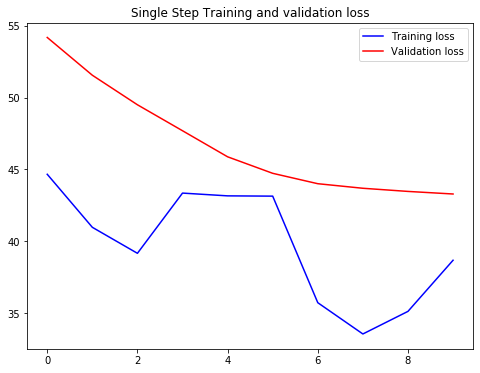

In [0]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

Predict a single step future

Now that the model is trained, predictions time. The model is given the history of three features over the past five days sampled, since the goal is to predict the Dept. delay, the plot only displays the past Dept. Delay. The prediction is made one day into the future (hence the gap between the history and prediction).

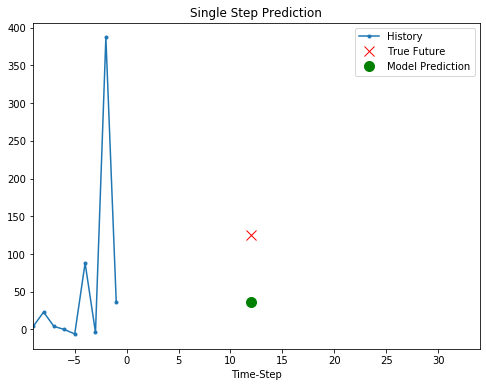

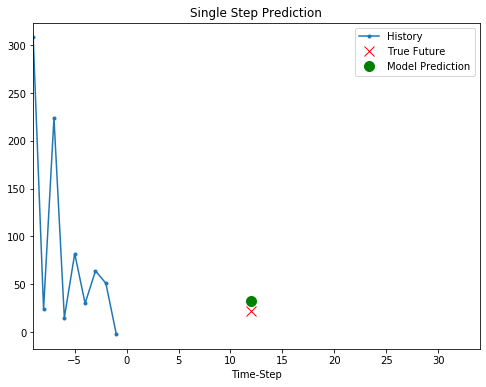

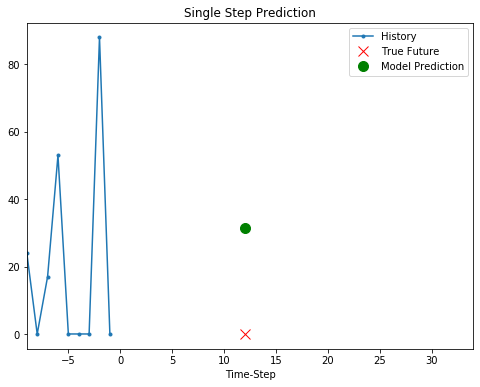

In [0]:
#Predict a single step future
#Now that the model is trained, predictions time. The model is given the history of three features over the past five days 
#sampled, since the goal is to predict the Dept. delay, the plot only displays the past Dept. Delay. The prediction is 
#made one day into the future (hence the gap between the history and prediction).
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()